# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [ ]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [ ]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 41.2MB/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.7MB/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [ ]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10)

In [ ]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.9920,  0.0024,  0.4489, -0.3111, -0.2030,  0.7330,  0.1533, -0.3393,
          0.4240, -0.0873]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [ ]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

            # Print por batch
        print(f"Época: {i}/{n_epochs}, Batch: {k}/{len(loader_train)}")

Época: 0/5, Batch: 0/600
Época: 0/5, Batch: 1/600
Época: 0/5, Batch: 2/600
Época: 0/5, Batch: 3/600
Época: 0/5, Batch: 4/600
Época: 0/5, Batch: 5/600
Época: 0/5, Batch: 6/600
Época: 0/5, Batch: 7/600
Época: 0/5, Batch: 8/600
Época: 0/5, Batch: 9/600
Época: 0/5, Batch: 10/600
Época: 0/5, Batch: 11/600
Época: 0/5, Batch: 12/600
Época: 0/5, Batch: 13/600
Época: 0/5, Batch: 14/600
Época: 0/5, Batch: 15/600
Época: 0/5, Batch: 16/600
Época: 0/5, Batch: 17/600
Época: 0/5, Batch: 18/600
Época: 0/5, Batch: 19/600
Época: 0/5, Batch: 20/600
Época: 0/5, Batch: 21/600
Época: 0/5, Batch: 22/600
Época: 0/5, Batch: 23/600
Época: 0/5, Batch: 24/600
Época: 0/5, Batch: 25/600
Época: 0/5, Batch: 26/600
Época: 0/5, Batch: 27/600
Época: 0/5, Batch: 28/600
Época: 0/5, Batch: 29/600
Época: 0/5, Batch: 30/600
Época: 0/5, Batch: 31/600
Época: 0/5, Batch: 32/600
Época: 0/5, Batch: 33/600
Época: 0/5, Batch: 34/600
Época: 0/5, Batch: 35/600
Época: 0/5, Batch: 36/600
Época: 0/5, Batch: 37/600
Época: 0/5, Batch: 38/

In [ ]:
print('Final loss:', loss.data)

Final loss: tensor(0.2514)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

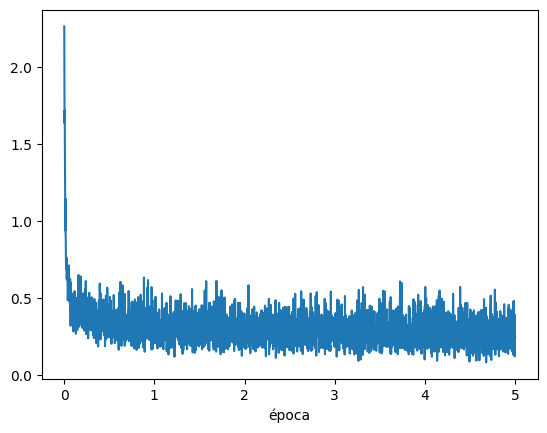

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

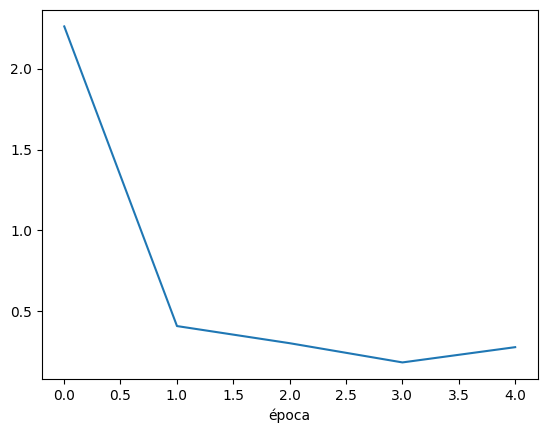

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

O tamanho é 100

2. Em uma época, quantos mini-batches existem?

600

3. Qual é a definição de época?

Um ciclo ou loop onde todas as amostras da base de dados são avaliadas pelo modelo, diretamente em mini-batchs. E após o  cálculo da perda, os pesos

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

Número de minibatches de trenamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>
Número de minibatches de trenamento: 60
torch.Size([1, 784])
Final loss: tensor(0.3488)


Text(0.5, 0, 'época')

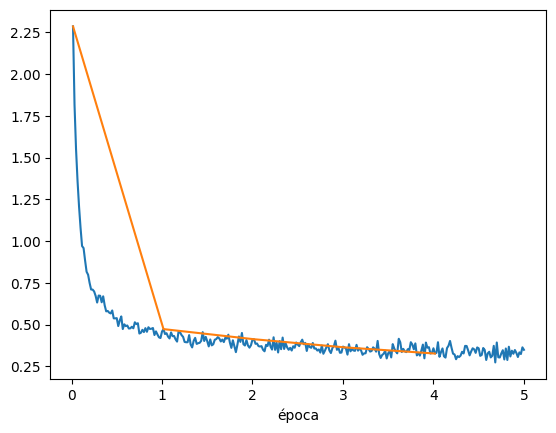

In [ ]:
#### EXERCÍCIO 2

batch_size = 1000

dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

model = torch.nn.Linear(28*28, 10)

x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

print('Final loss:', loss.data)

plt.plot(epochs, losses)
plt.xlabel('época')

plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

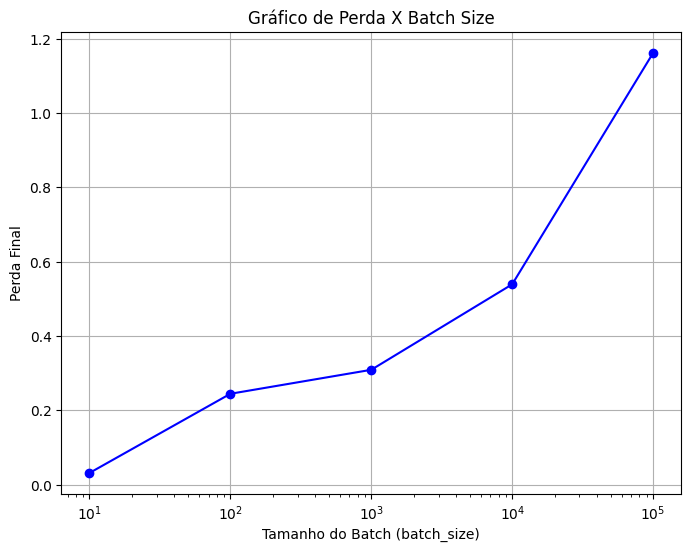

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Dataset base
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

def train_model(batch_size, n_epochs=5, learning_rate=0.5):
    # DataLoader com o batch_size fornecido
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    n_batches_train = len(loader_train)

    # Modelo
    model = torch.nn.Linear(28*28, 10)

    # Função de perda e otimizador
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Variáveis para plotar perda
    losses = []

    # Número total de amostras para normalizar épocas
    total_samples = len(dataset_train)

    # Treinamento
    for i in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train, start=1):
            # Transforma a entrada para uma dimensão
            inputs = Variable(x_train.view(-1, 28 * 28))

            # Predict da rede
            outputs = model(inputs)

            # Calcula a perda
            loss = criterion(outputs, Variable(y_train))

            # Zero, backpropagation, ajusta parâmetros pelo gradiente descendente
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Armazena a perda final de cada época para este batch_size
        losses.append(loss.item())

    return losses[-1]  # Retorna a última perda (final da última época)


# Lista de batch sizes
batch_sizes = [10, 100, 1000, 10000, 100000]

# Armazenar perdas para cada batch_size
losses_per_batch_size = []

# Executando o treinamento para cada batch_size e armazenando a perda final
for batch_size in batch_sizes:
    final_loss = train_model(batch_size=batch_size)
    losses_per_batch_size.append(final_loss)

# Plotando o gráfico Perda X Batch Size
plt.figure(figsize=(8, 6))
plt.plot(batch_sizes, losses_per_batch_size, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Usar escala logarítmica para o eixo x
plt.xlabel('Tamanho do Batch (batch_size)')
plt.ylabel('Perda Final')
plt.title('Gráfico de Perda X Batch Size')
plt.grid(True)
plt.show()



## Conclusões sobre os experimentos deste notebook


Foi criado acima uma função para aplicação de diferentes batch_sizes. Foram utilizados os batch_sizes de 10, 100, 1000 e 10000
No BS de 10, verifica-se pouca precisão no gráfico Época x perda
